In [115]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [117]:
data = pd.read_csv("/content/drive/My Drive/Research paper/Samsung.csv")
data.head()

,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [118]:
data.describe()

,Unnamed: 0,Price,Rating,Review Votes
count,63006.000000,63006.000000,63006.000000,63006.000000
mean,31502.500000,292.483788,3.972907,1.523537
std,18188.409867,261.309421,1.479209,9.954025
min,0.000000,9.990000,1.000000,0.000000
25%,15751.250000,159.990000,3.000000,0.000000
50%,31502.500000,221.990000,5.000000,0.000000
75%,47253.750000,385.000000,5.000000,1.000000
max,63005.000000,2408.730000,5.000000,645.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


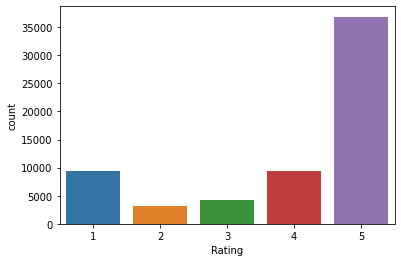

In [119]:
sns.countplot(data.Rating)

In [120]:
# Reviews with HTML Tag formats
i=0;
for sent in data['Reviews'].values:
    if (len(re.findall("<(\"[^\"]*\"|'[^']*'|[^'\">])*>", sent))):
        print(i)
        print(sent)
        print('--------------')
    i += 1;

4480
After less than 1 month of using this phone, we experienced texting issues - essentially texts wouldn't send & we'd get a failure message. A call to T Mobile customer service had us going through all kinds of hoops trying to diagnose the issue & finally the CS just told us to switch our SIM card. We did & the phone worked well for about 1 week. We are now back to texting issues & unable to receive/make phone call issues where we have to power down the phone, wait & power it up again.However, upon looking at the message boards on the T Mobile website, I learned that other people have this same issue & T Mobile has acknowledged the issue, but has not resolved it.<<This is a known issue with this device. Putting the phone on GSM only, as mike_s stated, is a workaround. We ask that you please be patient with us as we work with Samsung to come up with a resolution.>>The T Mobile workaround:I have found a few things that can help you text in the meantime. First, I'd look to uninstall an

In [121]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# print(set(stopwords.words('english')))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [122]:
def cleanhtml(sentence):    #function to clean the reviews with any html-tags
    cleanr = re.compile("<(\"[^\"]*\"|'[^']*'|[^'\">])*>")
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

In [123]:
def cleanpunc(sentence):  #function to clean the reviews of any punctuation or special characters
    cleaned = re.sub(r'[\|#]',r'',sentence) #removed '? ! ' " '
    cleaned = re.sub(r'[)|(|\|/|:|-|@|$|%|^|&|*]',r' ',cleaned)   #removed ". , ;"
    return  cleaned

In [124]:
filtered = []
for rev in data['Reviews'].values:
  clean = cleanhtml(rev)
  clean = cleanpunc(clean)
  filtered.append(clean)

In [125]:
data['Cleaned_Reviews'] = filtered
data_npr = data

In [126]:
data_npr.head()

,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Cleaned_Reviews
0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...
1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu..."
2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased
3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...
4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone. The only...


In [127]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def remove_stopwords(sentence):
  sentence = sentence.lower()
  word_tokens = word_tokenize(sentence)
  stop_words = set(stopwords.words('english'))
  filtered_sentence = []
  for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
  return filtered_sentence

In [128]:
data['tokenized_reviews'] = data['Cleaned_Reviews'].apply(lambda x: remove_stopwords(x))

In [129]:
data.head()

,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Cleaned_Reviews,tokenized_reviews
0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,"[feel, lucky, found, used, phone, us, used, ha..."
1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","[nice, phone, ,, nice, grade, pantach, revue, ..."
2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,[pleased]
3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,"[works, good, goes, slow, sometimes, good, pho..."
4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone. The only...,"[great, phone, replace, lost, phone, ., thing,..."


In [130]:
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language='english')
def stemming(str_list):
  stem_words = []
  for w in str_list:
    x = snow_stemmer.stem(w)
    stem_words.append(x)
  return stem_words

In [131]:
data['token_stem_reviews'] = data['tokenized_reviews'].apply(lambda x: stemming(x))

In [132]:
data.head()

,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Cleaned_Reviews,tokenized_reviews,token_stem_reviews
0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,"[feel, lucky, found, used, phone, us, used, ha...","[feel, lucki, found, use, phone, us, use, hard..."
1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","[nice, phone, ,, nice, grade, pantach, revue, ...","[nice, phone, ,, nice, grade, pantach, revu, ...."
2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,[pleased],[pleas]
3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,"[works, good, goes, slow, sometimes, good, pho...","[work, good, goe, slow, sometim, good, phone, ..."
4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone. The only...,"[great, phone, replace, lost, phone, ., thing,...","[great, phone, replac, lost, phone, ., thing, ..."


In [133]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
import torch
from transformers import BertTokenizer, BertModel

In [135]:
import logging
logging.basicConfig(level=logging.INFO)

In [155]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [171]:
str = data_npr.Cleaned_Reviews[0]
str

"I feel so LUCKY to have found this used  phone to us   not used hard at all , phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it   your honesty re  said used phone.I recommend this seller very highly   would but from them again!!"

In [172]:
str1 = "[CLS] "
for x in str:
  if x is '.':
    str1 = str1 + ". [SEP] "
  else:
    str1 = str1 + x

str = str1 + " [SEP]"

In [173]:
str

"[CLS] I feel so LUCKY to have found this used  phone to us   not used hard at all , phone on line from someone who upgraded and sold this one. [SEP]  My Son liked his old one that finally fell apart after 2. [SEP] 5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it   your honesty re  said used phone. [SEP] I recommend this seller very highly   would but from them again!! [SEP]"

In [174]:
tokenized_text = tokenizer.tokenize(str)
print (tokenized_text)

['[CLS]', 'i', 'feel', 'so', 'lucky', 'to', 'have', 'found', 'this', 'used', 'phone', 'to', 'us', 'not', 'used', 'hard', 'at', 'all', ',', 'phone', 'on', 'line', 'from', 'someone', 'who', 'upgraded', 'and', 'sold', 'this', 'one', '.', '[SEP]', 'my', 'son', 'liked', 'his', 'old', 'one', 'that', 'finally', 'fell', 'apart', 'after', '2', '.', '[SEP]', '5', '+', 'years', 'and', 'didn', "'", 't', 'want', 'an', 'upgrade', '!', '!', 'thank', 'you', 'seller', ',', 'we', 'really', 'appreciate', 'it', 'your', 'honesty', 're', 'said', 'used', 'phone', '.', '[SEP]', 'i', 'recommend', 'this', 'seller', 'very', 'highly', 'would', 'but', 'from', 'them', 'again', '!', '!', '[SEP]']


In [175]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

In [176]:
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
i             1,045
feel          2,514
so            2,061
lucky         5,341
to            2,000
have          2,031
found         2,179
this          2,023
used          2,109
phone         3,042
to            2,000
us            2,149
not           2,025
used          2,109
hard          2,524
at            2,012
all           2,035
,             1,010
phone         3,042
on            2,006
line          2,240
from          2,013
someone       2,619
who           2,040
upgraded      9,725
and           1,998
sold          2,853
this          2,023
one           2,028
.             1,012
[SEP]           102
my            2,026
son           2,365
liked         4,669
his           2,010
old           2,214
one           2,028
that          2,008
finally       2,633
fell          3,062
apart         4,237
after         2,044
2             1,016
.             1,012
[SEP]           102
5             1,019
+             1,009
years         2,086
and           1,998


In [177]:
c = 0
segments_ids = []
for x in tokenized_text:
  if x != '[SEP]':
    segments_ids.append(c)
  else:
    segments_ids.append(c)
    c+=1

In [178]:
print(segments_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [179]:
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [180]:
segments_tensors

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [181]:
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True) # Whether the model returns all hidden-states.

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [182]:
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [183]:
with torch.no_grad():

    outputs = model(tokens_tensor, segments_tensors)

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

In [186]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 88
Number of hidden units: 768


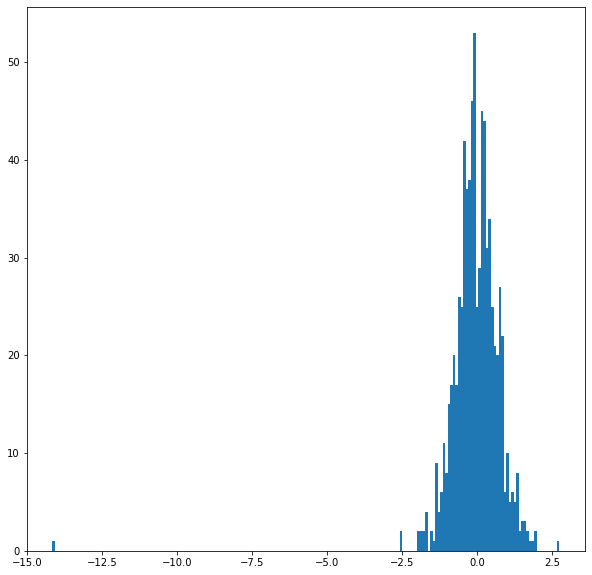

In [188]:
# For the 10th token in our sentence, select its feature values from layer 10.
token_i = 10
layer_i = 10
vec = hidden_states[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [191]:
token_embeddings = torch.stack(hidden_states, dim=0)
token_embeddings.size()

torch.Size([13, 1, 88, 768])

In [192]:
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)
token_embeddings.size()

torch.Size([13, 88, 768])

In [193]:
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)
token_embeddings.size()

torch.Size([88, 13, 768])

In [200]:
# Stores the token vectors, with shape [22 x 768]
token_vecs_sum = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

Shape is: 88 x 768


In [201]:
for i, token_str in enumerate(tokenized_text):
  print (i, token_str)

0 [CLS]
1 i
2 feel
3 so
4 lucky
5 to
6 have
7 found
8 this
9 used
10 phone
11 to
12 us
13 not
14 used
15 hard
16 at
17 all
18 ,
19 phone
20 on
21 line
22 from
23 someone
24 who
25 upgraded
26 and
27 sold
28 this
29 one
30 .
31 [SEP]
32 my
33 son
34 liked
35 his
36 old
37 one
38 that
39 finally
40 fell
41 apart
42 after
43 2
44 .
45 [SEP]
46 5
47 +
48 years
49 and
50 didn
51 '
52 t
53 want
54 an
55 upgrade
56 !
57 !
58 thank
59 you
60 seller
61 ,
62 we
63 really
64 appreciate
65 it
66 your
67 honesty
68 re
69 said
70 used
71 phone
72 .
73 [SEP]
74 i
75 recommend
76 this
77 seller
78 very
79 highly
80 would
81 but
82 from
83 them
84 again
85 !
86 !
87 [SEP]


In [203]:
print("Phone @ 10   ", token_vecs_sum[10][:5])
print("Phone @ 71  ", token_vecs_sum[71][:5])

Phone @ 10    tensor([ 0.3840,  1.0849,  0.6187, -2.6810, -1.6450])
Phone @ 71   tensor([ 4.9903,  3.1088,  4.0439, -2.2912,  1.0994])


In [205]:
from scipy.spatial.distance import cosine
phone_simi = 1 - cosine(token_vecs_sum[10], token_vecs_sum[71])
print(phone_simi)

0.8407026529312134
